# Linear Regression Project

In this workbook, we'll focus our attention on assessing whether a notional company should focus their efforts on developing the experience of their mobile app versus their web app.

## Imports
We'll import the following libraries to start off with data exploration:
- pandas: dataframe manipulation
- numpy: linear algebra implementations
- matplotlib: vizualizing our data
    - style: applies nice styling to plots
- seaborn: make nicer looking plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use("fivethirtyeight")
import seaborn as sns

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, such as Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member.

The following code cells will give us a brief introduction to the status of the dataframe as it stands.

In [2]:
customers = pd.read_csv("Ecommerce Customers")

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the workbook, we'll focus our analysis on the numerical fields from the customer data.

We can use seaborn's `jointplot` to view the pattern of the data while understanding the distributions.

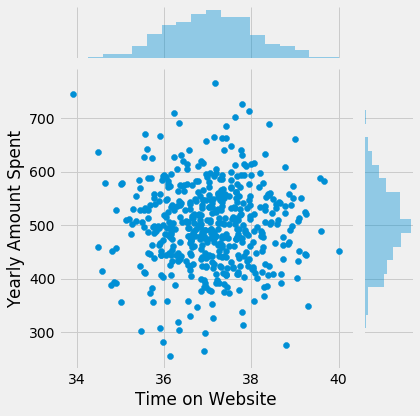

In [6]:
sns.jointplot(x = "Time on Website", y = "Yearly Amount Spent", data = customers)

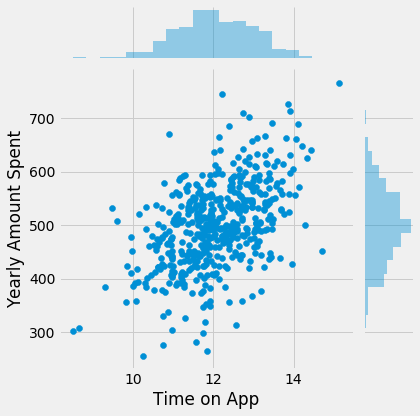

In [7]:
sns.jointplot(x = "Time on App", y = "Yearly Amount Spent", data = customers)

At first glance, there appears to be a linear relationship between `Time on App` and `Yearly Ammount Spent`. 

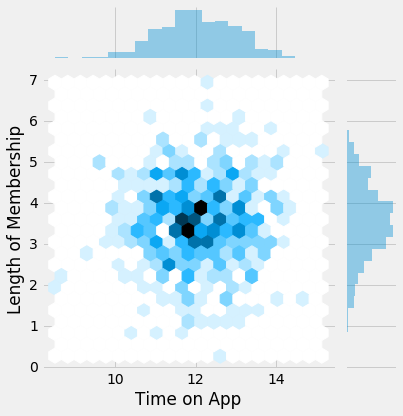

In [8]:
sns.jointplot(x = "Time on App", y = "Length of Membership", data = customers, kind = "hex")

Again, the relationship above appears to be linear in nature.  We'll use seaborn's `pairplot` to view the relationships within a matrix plot.

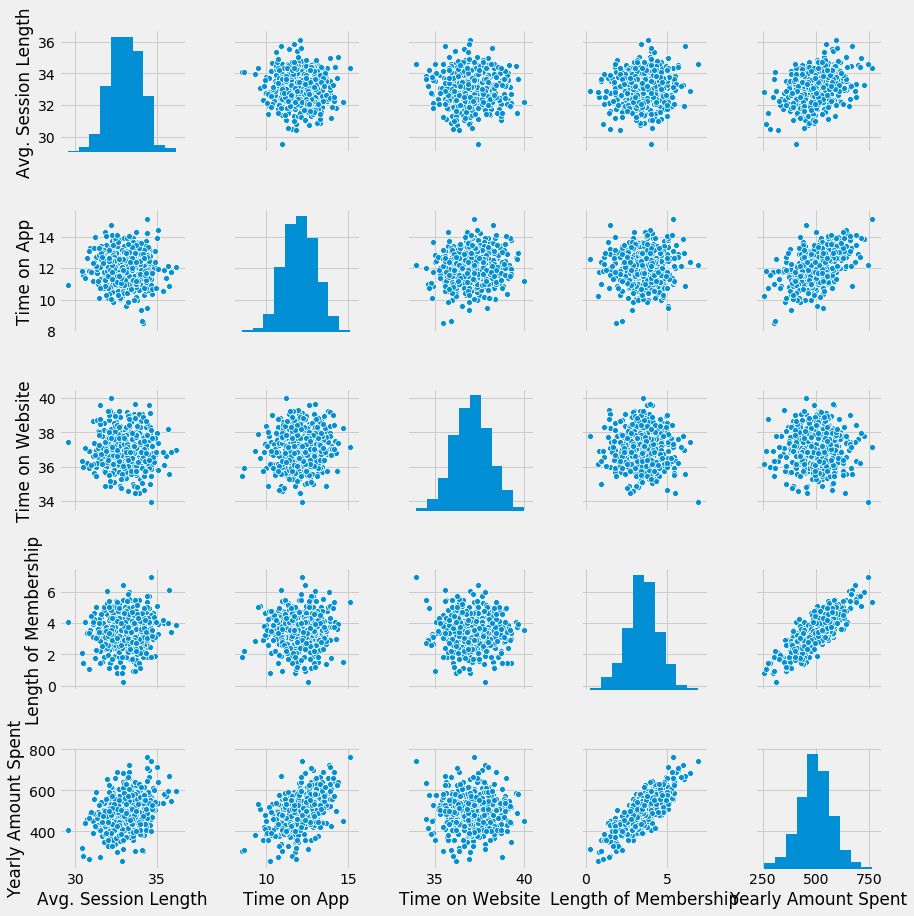

In [9]:
sns.pairplot(data = customers)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

It appears that `Length of Membership` is the most positively correlated with `Yearly Amount Spent`.  We'll explore this relationship by constructing an `lmplot`, which will display a line of best fit on the defined features.

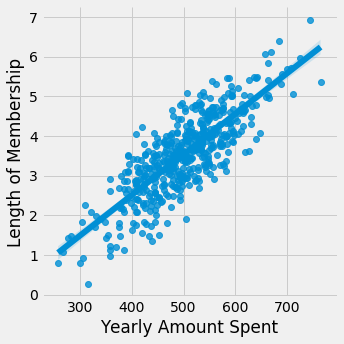

In [10]:
sns.lmplot(x = "Yearly Amount Spent", y = "Length of Membership", data = customers)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets for implementation into the machine learning pipeline.  We begin by saving the features we'll use to predict `Yearly Amount Spent`as it's own variable and assigning the `Yearly Amount Spent` as it's own variable to keep the machine learning process unbiased. 

In [11]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [12]:
y = customers['Yearly Amount Spent']

With the features split, we'll import scikit-learn and split the newly saved variables into a training and test set.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

## Training the Model

After splitting the data into training and test sets, we import the `linear_model` module from scikit-learn in order to fit the training set to the linear model.

In [15]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In order to understand the effects our features have on our predicted variable, we can analyze the coeffecients resulting from the model fitting process.

In [16]:
coef = lm.coef_
for feat, coef in zip(X, coef):
    print(f"{feat}: {coef}")

Avg. Session Length: 25.981549723495785
Time on App: 38.59015875311408
Time on Website: 0.19040527751100175
Length of Membership: 61.27909654482182


The coeffecients above tell us that for each singular unit increase in a given feature, an increase of $x$ is expected for `Yearly Amount Spent`.

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

We start the process by saving the predicted values from the test set to its own variable.

In [17]:
predictions = lm.predict(X_test)

We can actually see the predicted values through the use of seaborn's `scatterplot`.

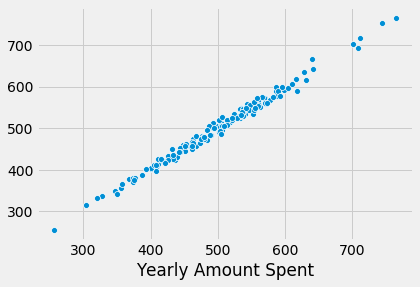

In [18]:
sns.scatterplot(x = y_test, y = predictions)

The plot above indicates that the predictions properly fall along the line of best fit.  The appearance of a straight/linear relationship is a sign that our model worked properly.

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score ($R^2$).

We'll include a multitude of metrics for transparancy purposes, but we'll focus on the Root Mean Square Error (RMSE) below, as this metric gives us a better idea of our model's performance (RMSE punishes potential outliers much more than taking the Mean Absolute Error, and the Mean Squared Error is not as simple to interpret).

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

MAE: 7.228148653430835
MSE: 79.81305165097467
RMSE: 8.933815066978646


By referring to the RMSE, our model's predictions are off by about 9 dollars on average.  For our use-case, a RMSE of ~9 is acceptable since the average amount spent per year is around 500 dollars (as shown below).

In [20]:
print("Average Yearly Amount Spent: " + str(customers["Yearly Amount Spent"].describe().loc["mean"]))

Average Yearly Amount Spent: 499.3140382585909


## Residuals

Let's explore the residuals to make sure everything was okay with our data. 

We'll plot the residuals (or the distance between the line of best fit and the true data) to check whether the residuals are normally distributed.  Our goal is to see a distribution that is close to the normal distribution (shaped as a bell-curve).

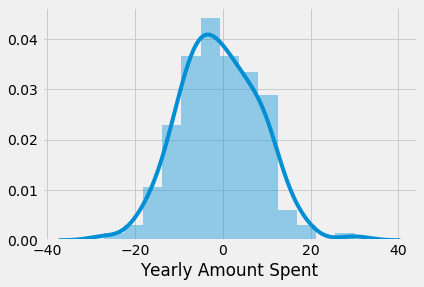

In [21]:
sns.distplot((y_test - predictions))

We do stray a bit from the typical normal distribution; however, the majority of the residuals are around the 0 marker, meaning that our residuals tend to be close together with a few exceptions on the tails of the distribution.

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforts on mobile app or website development? Let's see if we can interpret the coefficients at all to get an idea.

Let's create a new dataframe the contains the coefficients from our model using the full dataframe rather than the split data.

In [22]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in `Avg. Session Length` is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in `Time on App` is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in `Time on Website` is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in `Length of Membership` is associated with an **increase of 61.27 total dollars spent**.

**Should the company focus more on their mobile app or on their website?**


There are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. `Length of Membership` tends to lead to a large increase in `Yearly Amount Spent`, meaning that the company should not only focus their attention towards developming their application, but they should also focus on keeping their members for the long-haul.
